## Heart Attack

O objetivo da análise é entender a possibilidade de uma pessoa ter um ataque do coração.
Os dados foram retirados do kaggle de um estudo feito com residentes de Framingham em Massachusetts

Dados:

Demográfico:

- Male: 1 ou 0 (Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Educação: 
- no further information provided

Hábitos:

- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can 
have any number of cigarettes, even half a cigarette.)

Histórico médico
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Condições médicas

- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous) (pressão arterial)
- Dia BP: diastolic blood pressure (Continuous) (descanso entre as batidas)
- BMI: Body Mass Index
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Target variable to predict:

- 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


informações retiradas do kaggle (https://www.kaggle.com/captainozlem/framingham-chd-preprocessed-data)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# leitura de dataset
data = pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# não é necessário ter a coluna education para prever ataques de coração.
data.drop(['education'], axis=1, inplace=True)

In [7]:
# Verificação de valores nulos
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data[data.heartRate.isnull()]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


Para as variáveis quantitativas discretas mantive os dados faltantes, colocando sua média, porém antes analisando se as distribuições dos dados estavam claras.

In [9]:
data.heartRate.fillna(round(data.heartRate.mean(), 2), inplace=True)

In [10]:
data.BMI.fillna(round(data.BMI.mean(), 2), inplace=True)

In [11]:
data.totChol.fillna(round(data.totChol.mean(), 2), inplace=True)

In [12]:
data.glucose.fillna(round(data.glucose.mean(), 2), inplace=True)

In [13]:
data[data.cigsPerDay.isnull()].head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,81.97,0
139,1,49,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.00,1
1046,0,49,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.00,0
1292,1,42,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.00,0
1347,0,58,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,81.97,0


In [14]:
data.cigsPerDay.fillna(int(data.cigsPerDay.mean()), inplace=True)

Removi as variáveis faltantes categóricas (qualitativa nominal) da base.

In [15]:
# remover itens se paciente toma remédio para pressão

data.drop(data[data['BPMeds'].isnull()].index, inplace=True)

In [16]:
# Verificação de valores nulos
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### EDA (Exploratory data analysis)

In [17]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000,4185.000000
mean,0.431063,49.535484,0.494863,9.013620,0.029630,0.005735,0.309200,0.025568,236.675097,132.289486,82.886738,25.804688,75.876674,81.961869,0.151254
std,0.495284,8.555088,0.500033,11.875975,0.169584,0.075520,0.462219,0.157860,44.221695,21.987745,11.878908,4.067446,12.054731,22.908759,0.358340
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.420000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

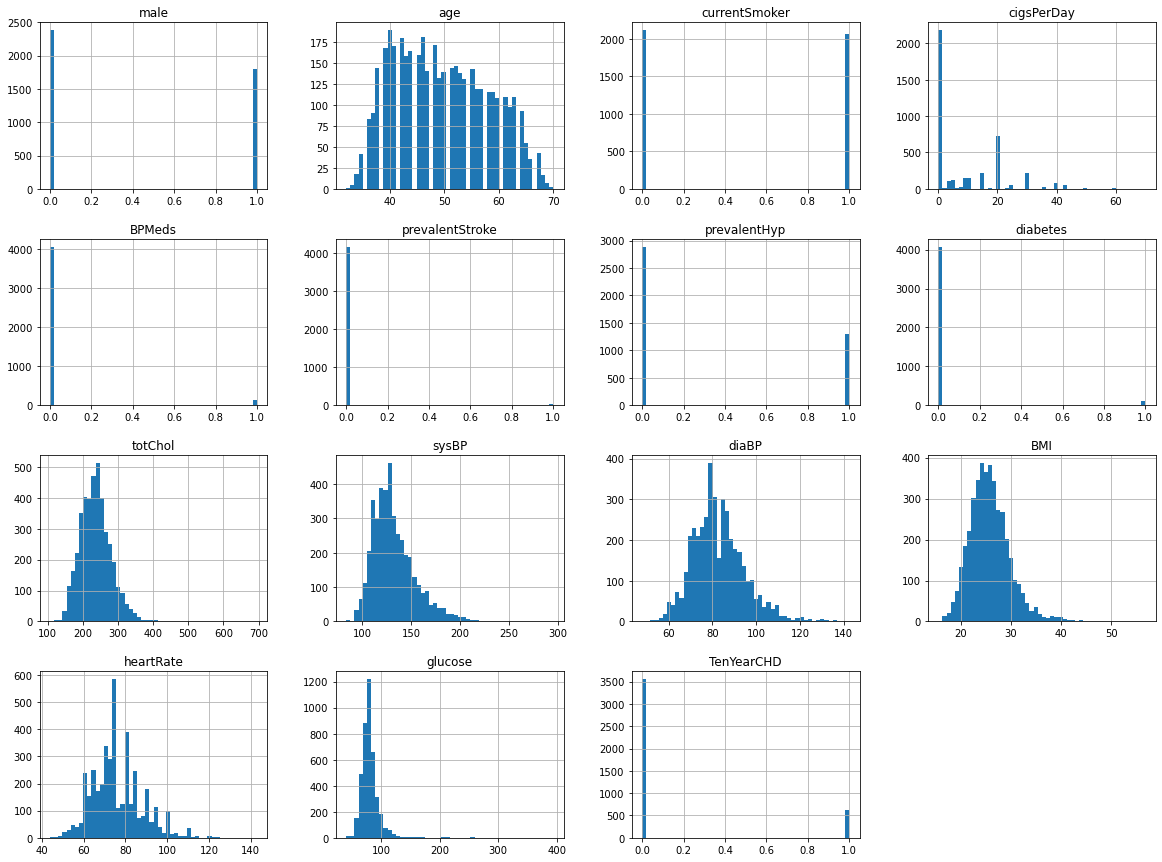

In [18]:
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

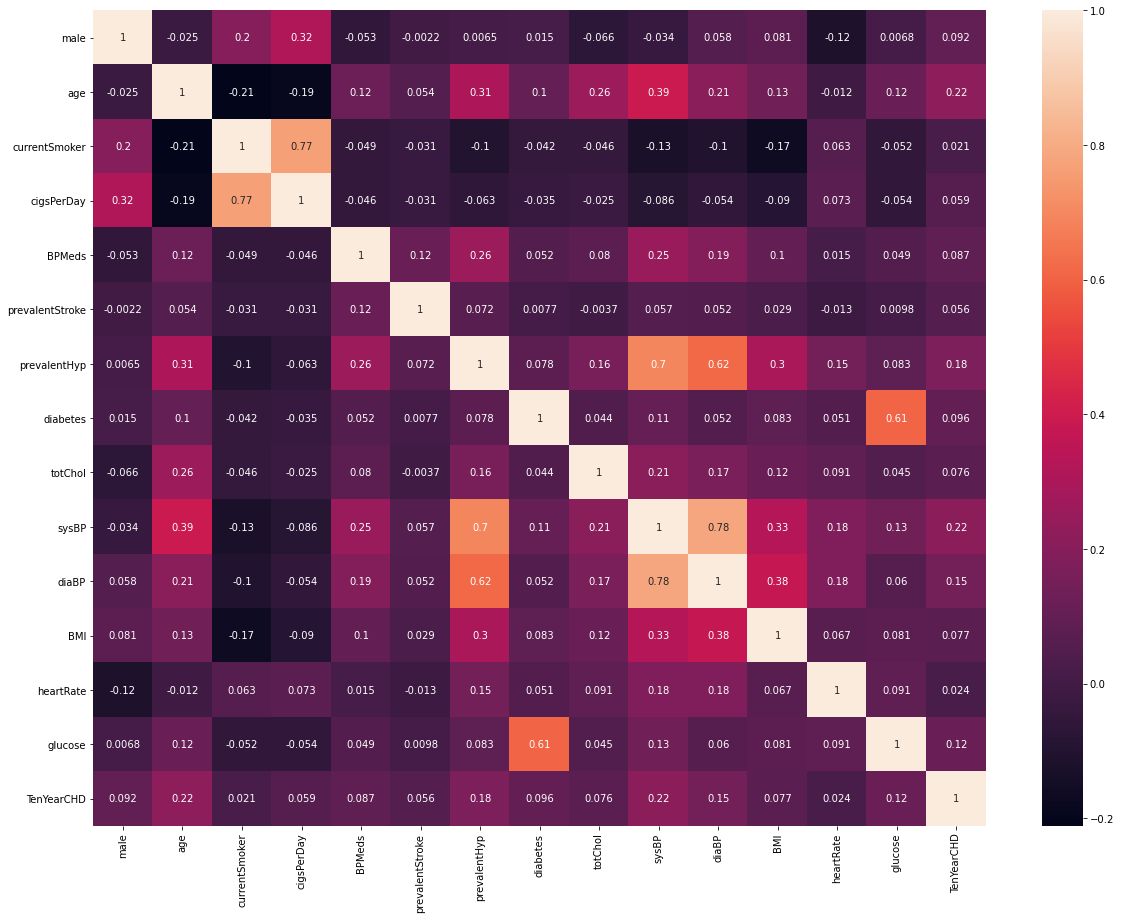

In [19]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

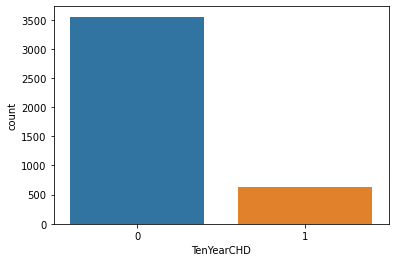

In [20]:
sns.countplot(x=data.TenYearCHD, data=data)

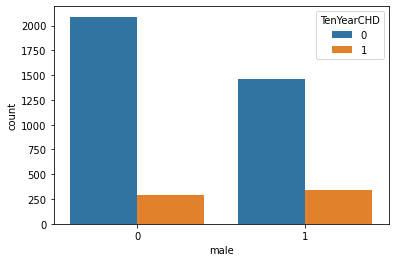

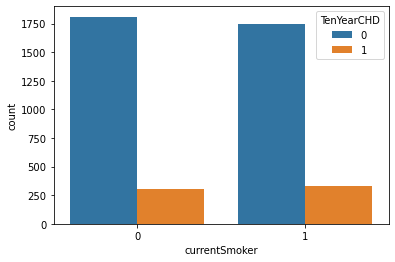

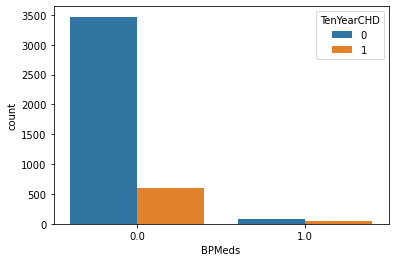

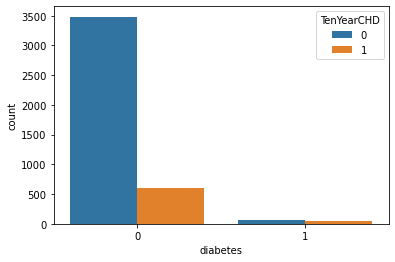

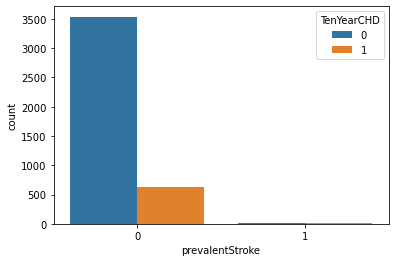

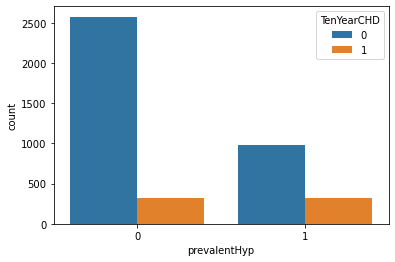

In [21]:
for i in ['male', 'currentSmoker', 'BPMeds', 'diabetes', 'prevalentStroke', 'prevalentHyp']:
    plt.figure(i)
    sns.countplot(x=i, hue='TenYearCHD', data=data)

Verificar importância das variáveis categoricas. Interessante ressaltar que alguns insights como possuem mais mulheres do que homens na base, porém ataques cardíacos em homens são maiores. O número de pessoas da base que fumam não sofrem tanto ataque cardíaco quanto o imaginado.

In [22]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [73]:
# preparando os dados

# X = data.drop('TenYearCHD', axis=1)
Y = data['TenYearCHD']
X = data.drop(['TenYearCHD', 'glucose', 'prevalentStroke', 'BPMeds', 'currentSmoker'], axis=1)


### Hold-Out

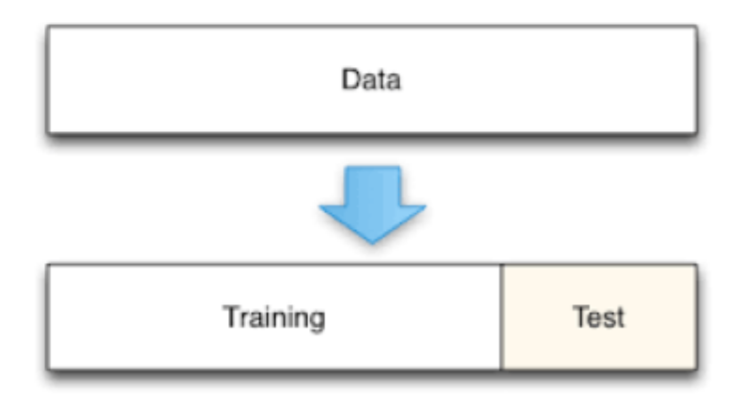

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Regressão Logística

A regressão logística é um tipo de regressão utilizada no caso de resposta binária. O valor retornado pela regressão logística representa a probabilidade de ocorrer o evento de interesse.

In [76]:
import statsmodels.api as sm

logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

# Entendo que o default de todos os programas é 0.05.. maior que isso perde a significância. (p-value)
# para saúde o caso 0.05 pode ser menor ainda.

Optimization terminated successfully.
         Current function value: 0.397568
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3348
Model:                          Logit   Df Residuals:                     3338
Method:                           MLE   Df Model:                            9
Date:                Thu, 07 Oct 2021   Pseudo R-squ.:                 0.05224
Time:                        13:29:24   Log-Likelihood:                -1331.1
converged:                       True   LL-Null:                       -1404.4
Covariance Type:            nonrobust   LLR p-value:                 4.159e-27
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
male             0.4597      0.108      4.251      0.000       0.248       0.672
age              0.0259

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
reg_log = LogisticRegression(C=1)

In [79]:
reg_log.fit(X, Y)

C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [80]:
reg_log.score(X_test,Y_test)

0.8375149342891278

In [81]:
y_pred = reg_log.predict(X_test)

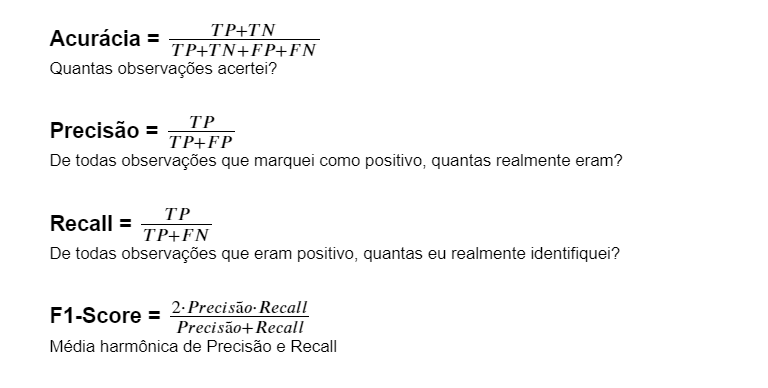

In [82]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       700
           1       0.57      0.03      0.06       137

    accuracy                           0.84       837
   macro avg       0.71      0.51      0.48       837
weighted avg       0.80      0.84      0.77       837



In [83]:
X_test

,male,age,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
2538,0,43,0.0,0,0,232.00,126.0,73.0,20.43,72.0
2042,1,54,0.0,1,0,225.00,134.5,92.5,30.62,78.0
3740,1,36,0.0,0,0,230.00,122.0,78.0,26.53,45.0
3513,0,38,0.0,0,0,240.00,126.5,75.5,24.38,71.0
1906,0,54,0.0,0,0,286.00,110.0,74.0,26.28,65.0
...,...,...,...,...,...,...,...,...,...,...
2853,1,46,40.0,0,0,165.00,107.0,82.0,24.67,60.0
3425,0,53,20.0,1,0,256.00,128.0,90.0,23.65,105.0
706,0,51,0.0,1,0,160.00,140.5,84.0,26.28,76.0
2991,0,45,0.0,1,0,252.00,160.0,105.0,31.72,65.0


In [91]:
import numpy as np
reg_log.predict(np.array([[1, 61, 1, 1, 1, 260.0, 90.0, 50.56, 80.0, 80.0]]))

array([0], dtype=int64)

In [101]:
reg_log.predict(np.array([[0, 54, 20, 1, 0, 2, 300, 101, 70.9, 40]]))

array([1], dtype=int64)

### Decision Tree

Uma árvore de decisão é uma representação de uma tabela de decisão sob a forma de árvore. Trata-se de uma forma alternativa de expressar as mesmas regras que são obtidas quando se constrói a tabela.

In [102]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion="entropy", max_depth=2)
arvore.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [103]:
y_pred2 = arvore.predict(X)

In [104]:
accuracy_score(Y, y_pred2)

0.8487455197132616

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3552
           1       0.00      0.00      0.00       633

    accuracy                           0.85      4185
   macro avg       0.42      0.50      0.46      4185
weighted avg       0.72      0.85      0.78      4185



C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
NB = GaussianNB()
NB.fit(X,Y)

GaussianNB()

In [108]:
y_pred3 = NB.predict(X)

In [109]:
accuracy_score(Y, y_pred3)

0.8124253285543608